# KS Simulation


This notebook just show how to use the KS class and provides sample code to visualize the result. 

In [0]:
import numpy as np
from KS import KS
import matplotlib.pyplot as plt

Set the main paramaters of the simulation

In [0]:
Tend = 10000 # the total time of the simulation
dt = 1 # the time step 
L=20 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
N=64 # the number of sample points on this length. 


For initial conditions, we have the choice. Let's plot some of the initial conditions done to study

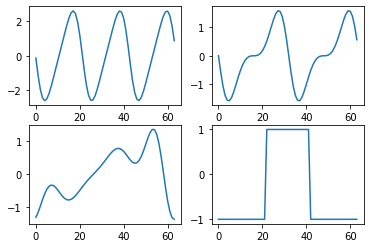

In [0]:
idx=1
for fn in ('u1.dat', 'u2.dat','u3.dat'):
    U_bf = np.loadtxt(fn) 
    ax=plt.subplot(2, 2, idx)
    ax.plot(U_bf)
    idx+=1
# This last is mine
U_bf = np.ones(64)*(-1)
U_bf[22:42] = 1
ax=plt.subplot(2, 2, idx)
ax.plot(U_bf)
plt.show()

In [0]:
print("Time points : ", Tend/dt)

Time points :  10000.0


In [0]:
ks = KS(L=L,N=N,dt=dt)

In [0]:
observation = U_bf
action = np.zeros(1)
U = np.matrix(U_bf) # We will stack in U at each time step

TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime, "seconds")
taxis = 0 
for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))

    


Running for :  10000 seconds


In [0]:
# Explore the results 
print(U.shape,taxis.shape)
print(taxis[-1])

(10001, 64) (10001,)
10000


In [0]:
ks.x.shape

(64,)

# Drawing the KS simulation

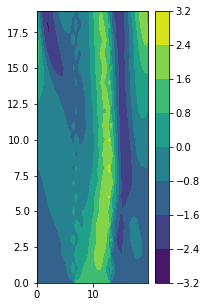

In [0]:
h=5 # the height of the figure
lg=20
fig = plt.figure(figsize=(h/2, h))
ax = fig.gca()
ola = ax.contourf(ks.x, taxis[:lg], U[:lg,:],  cmap=plt.cm.viridis)
cbar = plt.colorbar(ola)
plt.show()

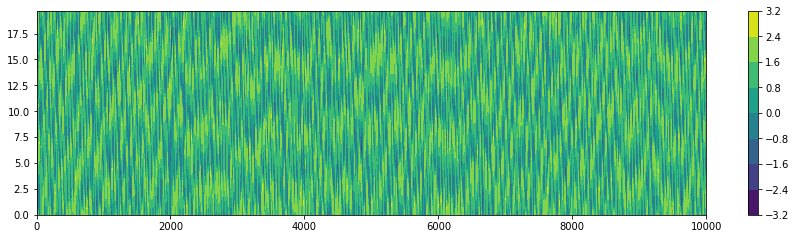

In [0]:
w=15 # the width of the figure
fig = plt.figure(figsize=(w, w/4))
ax = fig.gca()
ola = ax.contourf(taxis, ks.x, U.T,  cmap=plt.cm.viridis)
cbar = plt.colorbar(ola)
plt.show()

## Look closer

Start with a shortcut

In [0]:
def drawKS(U_sim, x_axis, t_axis ,startT=0,endT=0, width = 10, divwidth = 4): 
    fig = plt.figure(figsize=(width, width/divwidth))
    ax = fig.gca()
    ola = ax.contourf( t_axis[startT:endT], x_axis, U_sim[startT:endT,:].T,  cmap=plt.cm.viridis)
    cbar = plt.colorbar(ola)
    plt.show()

Look at the starting propagation

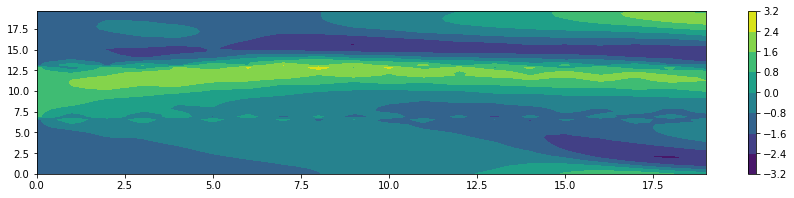

In [0]:
drawKS(U, ks.x, taxis,0,20,15,5)


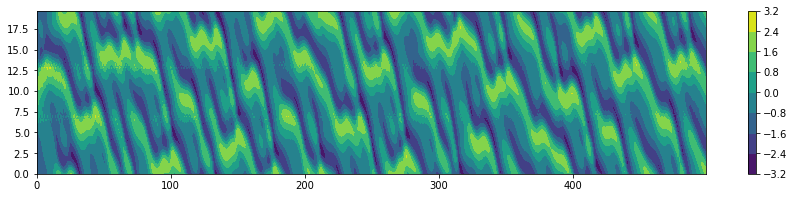

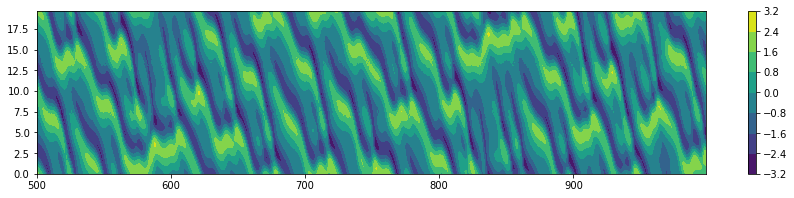

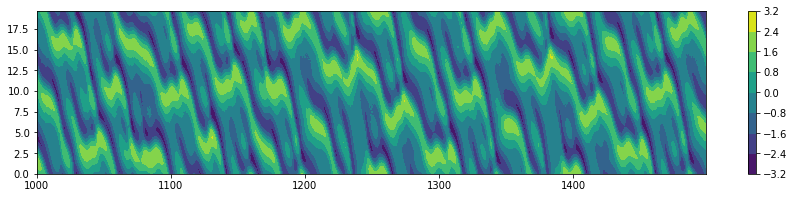

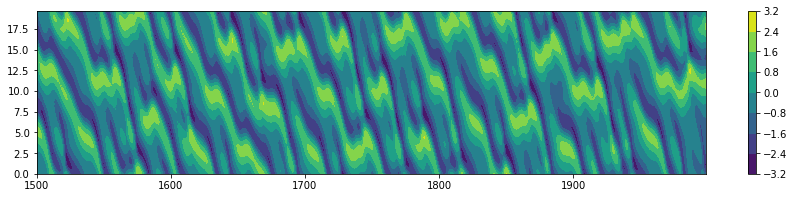

In [0]:
dom=500
for slide in range(4): 
    drawKS(U, ks.x, taxis,0+slide*dom,dom*(slide+1),15,5)


At the end 

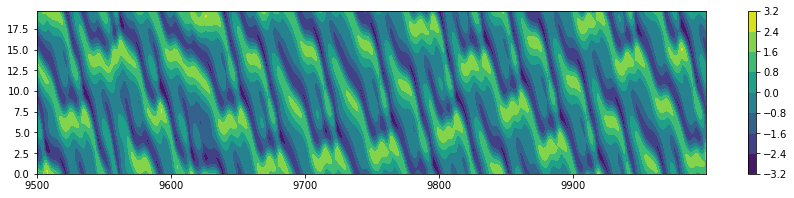

In [0]:
drawKS(U, ks.x, taxis,9500,10000,15,5)


# Note on the time and dt 
If we run two KS simulation: 
- Tend = 1000 and dt = 0.1
- Tend = 10000 and dt = 1
They both cover the same time domain however the results differ. 


In [0]:
Tend=1000
dt = 0.1
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
U1=U
ks1=ks

Running for :  10000


In [0]:
Tend=1000
dt = 0.01
ks = KS(L=L,N=N,dt=dt)
observation = np.loadtxt('u1.dat')
TotalTime= int(np.round(Tend/dt))
print("Running for : ",TotalTime)
taxis = 0 
action = np.zeros(1)
U = np.matrix(observation) # We will stack in U at each time step

for nt in range(TotalTime): 
    observation = ks.advance(observation,action)
    U = np.vstack((U,observation))
    taxis = np.hstack((taxis,(nt+1)*ks.dt))
    if taxis[-1]==100:
      print('ok1')
    if taxis[-1]==1000:
      print('ok2')
    if taxis[-1]==10000:
      print('ok3')
    if taxis[-1]==50000:
      print('ok4')
U2=U
ks2=ks

Running for :  100000
ok1
ok2


In [0]:
drawKS(U1, ks1.x, taxis,0,10000,15,5)
drawKS(U2, ks2.x, taxis,0,1000,15,5)


NameError: ignored

In [0]:
print(U.shape[0], ks.x.shape[0])

NameError: ignored